# Исследовательский анализ инвестиционного рынка
Выполнил: Клементьев В.Д  
Дата: 20.03.25

## Цели и задачи проекта 
Провести комплексный анализ рынка инвестиций в стартапы, выявить ключевые тенденции в финансировании, определить наиболее перспективные отрасли и сформулировать рекомендации для инвесторов на основе данных.

## Описание данных  
`acquisition.csv` - информация о покупках одними компаниями других компаний  
`company_and_rounds.csv` - информация о компаниях и раундах финансирования  
`education.csv` - информация об образовании сотрудников  
`people.csv` - информация о сотрудниках  
`degrees.csv` - информация о типе образования сотрудника

Описание датасета `acquisition.csv`:  
    `id` — идентификатор покупки.  
    `acquiring_company_id` — идентификатор покупающей компании.  
    `acquired_company_id` — идентификатор покупаемой компании.  
    `term_code` — варианты расчёта.  
    `price_amount` — сумма сделки.  
    `acquired_at` — дата сделки.

Описание датасета `company_and_rounds.csv`:  
    `company ID` — идентификатор компании.  
    `name` — название компании.  
    `category code` — категория области деятельности компании.  
    `status` — статус компании.  
    `founded at` — дата инвестирования.  
    `closed at` — дата закрытия компании.  
    `domain` — официальный сайт компании.  
    `network username` — ник компании в сети.  
    `country code` — код страны компании.  
    `investment rounds` — число инвестиционных раундов.  
    `funding rounds` — число раундов финансирования.  
    `funding total` — сумма финансирования.  
    `milestones` — вехи финансирования.  
    `funding round id`— идентификатор этапа финансирования.  
    `company id` — идентификатор компании.  
    `funded at` — дата финансирования.  
    `funding round type` — тип финансирования.  
    `raised amount` — сумма финансирования.  
    `pre money valuation`— предварительная денежная оценка.  
    `participants` — число участников.  
    `is first round` — является ли раунд первым.  
    `is last round` — является раунд последним.  

Описание датасета `education`:  
    `id` — идентификатор записи об образовании.  
    `person_id` — идентификатор работника.  
    `instituition` — название учебного заведения.  
    `graduated_at` — дата получения образования.

Описание датасета `people`:  
    `id` — идентификатор сотрудника.  
    `first_name` — имя сотрудника.  
    `last_name` — фамилия сотрудника.  
    `company_id` — идентификатор компании.  
    `network_username` — ник в социальных сетях.

Описание датасета `degrees`:  
    `id` — идентификатор записи.  
    `object_id` — идентификатор сотрудника.  
    `degree_type` — тип образования.  
    `subject` — специальность.  

## Содержание проекта
1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации

## Знакомство с данными: загрузка и первичная предобработка 

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в переменных: `acq_df`, `company_rounds_df`, `ed_df`, `people_df` и `degrees_df`.

In [192]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт функции для создания диаграммы Венна
from matplotlib_venn import venn2

In [193]:
# Присваиваем переменной строку с повторяющимся путём для улучшения читаемости кода
PATH = 'https://code.s3.yandex.net/datasets/'

# Выгружаем данные в переменные
try:
    # Попытка загрузить файлы локально
    acq_df = pd.read_csv('acquisition.csv')
    company_rounds_df = pd.read_csv('company_and_rounds.csv')
    ed_df = pd.read_csv('education.csv')
    people_df = pd.read_csv('people.csv')
    degrees_df = pd.read_csv('degrees.csv')
except FileNotFoundError:
    # Если локальные файлы не найдены, загружаем файлы с платформы
    acq_df = pd.read_csv(PATH + 'acquisition.csv')
    company_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
    ed_df = pd.read_csv(PATH + 'education.csv')
    people_df = pd.read_csv(PATH + 'people.csv')
    degrees_df = pd.read_csv(PATH + 'degrees.csv')

# Настраиваем формат отображения чисел
pd.set_option('display.float_format', '{:,.2f}'.format)

Познакомимся с данными датасетов — выведем первые строки методом `head()` и информацию методом `info()`:

In [194]:
# Выводим первые строки датафрейма на экран
acq_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [195]:
# Выводим информацию о датафрейме
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


- названия столбцов соответствуют стилю snake case.
- `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` представлены целыми числами.
- `term_code` и `acquired_at` имеют тип `object` и содержат пропуски. Так как варианты оплаты ограничены, конвертируем `term_code` в `category`, оптимизировав память. А `acquired_at`, который указывает на дату сделки, приведем к типу `datetime`.

In [196]:
# Преобразование данных
acq_df['term_code'] = acq_df['term_code'].astype('category')
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'], errors='coerce')

# Выводим информацию о датафрейме
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   category      
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(4)
memory usage: 376.9 KB


In [197]:
# Выводим первые строки датафрейма на экран
company_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Выводим информацию о датафрейме
company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

- столбцы представлены в неудобном для анализа виде. Приведем их к snake case.
- `company  ID`, `investment  rounds`, `funding  rounds`, `milestones`, `funding  round  id`, `company  id`, `participants`, `is  first  round`, `is  last  round` не могут иметь дробной части. Их следует проебразовать в целочисленный тип и оптимизировать разрядность там, где необходимо.
- `category code`, `status`, `country code`, `funding round type` содержат данные с ограниченным набором значений (категориальные данные). Для удобства анализа приведем их к типу `category`.
- `founded at`, `closed at`, `funded at` необходимо преобразовать в тип `datetime` для дальнейшего анализа временных данных.
- различие в плотности данных делит таблицу на две группы: 21472 и 52928 непустых строк. Обе группы содержат идентификатор компании, что, вероятно, указывает на то, что датасет состоит из двух логически связанных таблиц. Первая таблица описывает компании, а вторая содержит информацию о событиях (раундах финансирования).

In [199]:
# Обрабатываем типы данных 
convert_to_int = ['company  ID', 'investment  rounds', 'funding  rounds', 'milestones', 'funding  round  id', 'company  id', 'participants', 'is  first  round', 'is  last  round']

for col in convert_to_int:
    company_rounds_df[col] = company_rounds_df[col].astype('Int64')
    company_rounds_df[col] = pd.to_numeric(company_rounds_df[col], errors='coerce', downcast='integer')

# Приведение названий столбцов к snake_case
company_rounds_df.columns = [el.replace('  ', '_') for el in company_rounds_df.columns]

convert_to_datetime = ['funded_at', 'closed_at', 'founded_at']

for col in convert_to_datetime:
    company_rounds_df[col] = pd.to_datetime(company_rounds_df[col], errors='coerce')

convert_to_category = ['category_code', 'status', 'country_code', 'funding_round_type']

for col in convert_to_category:
    company_rounds_df[col] = company_rounds_df[col].astype('category')

# Выводим информацию о датафрейме
company_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int32         
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  category      
 9   investment_rounds    217472 non-null  Int16         
 10  funding_rounds       217472 non-null  Int8          
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  Int8          
 13  funding_round_

Построим диаграмму Венна и проверим, насколько сильно совпадают ключи:

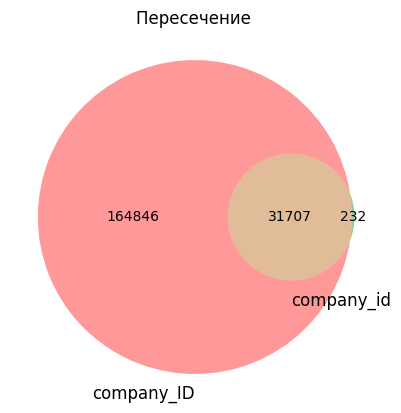

In [200]:
first_id = set(company_rounds_df['company_ID'].dropna().unique())
second_id = set(company_rounds_df['company_id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_ID', 'company_id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

Большинство индентификаторов компаний из одной таблицы присутствуют в другой. Это пересечение указывает на то, что данные в обеих таблицах связаны через общие идентификаторы компаний, что подтверждает гипотезу о логической связи между таблицами.

In [201]:
# Выводим первые строки датафрейма на экран
ed_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [202]:
# Выводим информацию о датафрейме
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


- Информация о дате выпуска содержит много пропусков и имеет тип `object`. Приведем столбец к `datetime`.

In [203]:
# Обрабатываем тип данных
ed_df['graduated_at'] = pd.to_datetime(ed_df['graduated_at'], errors='coerce')

# Выводим информацию о датафрейме
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [204]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


In [205]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


- `company_id` имеет тип `float64` и содержит пропуски. Преобразуем столбец в `int64`.

In [206]:
# Обрабатываем тип данных 
people_df['company_id'] = people_df['company_id'].astype('Int64')

# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226700 non-null  object
 2   last_name         226705 non-null  object
 3   company_id        34615 non-null   Int64 
 4   network_username  38867 non-null   object
dtypes: Int64(1), int64(1), object(3)
memory usage: 8.9+ MB


In [207]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [208]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


- `degree_type` и `subject` содержат пропуски.

В результате предобработки в датасетах было обнаружено большое количество пропусков, которые могут искажать результаты анализа. Но данных в целом достаточно, чтобы ответить на поставленнные вопросы. 

## Предобработка данных, предварительное исследование
### Раунды финансирования по годам  
Посмотрим, как меняется рынок инвестиций с течением времени. Создадим сводную таблицу с годами, раундами и типичным размером средств:

In [209]:
# Фильтруем от пропусков
filtered_rounds = company_rounds_df[company_rounds_df['funded_at'].isna() == False]

# Создаем сводную таблицу
pivot = filtered_rounds.pivot_table(
    index=filtered_rounds['funded_at'].dt.year, # Преобразуем дату в год 
    values='raised_amount',
    aggfunc={'raised_amount': ['count', 'median']}
)

# Изменяем названия столбцов и сбрасываем индекc
pivot = pivot.reset_index()
pivot.columns = ['год', 'общее количество раундов финансирования', 'типичный размер средств']
# Фильтруем по раундам финансирования
pivot = pivot[pivot['общее количество раундов финансирования'] > 50]

pivot

,год,общее количество раундов финансирования,типичный размер средств
15,1999,76,"2,000,000.00"
16,2000,125,"4,200,000.00"
17,2001,96,"3,000,000.00"
18,2002,116,"4,200,000.00"
19,2003,159,"3,000,000.00"
20,2004,291,"5,000,000.00"
21,2005,1633,"5,500,000.00"
22,2006,2436,"5,000,000.00"
23,2007,3279,"3,973,320.00"
24,2008,3774,"3,110,000.00"


Визуализируем получившийся результат:

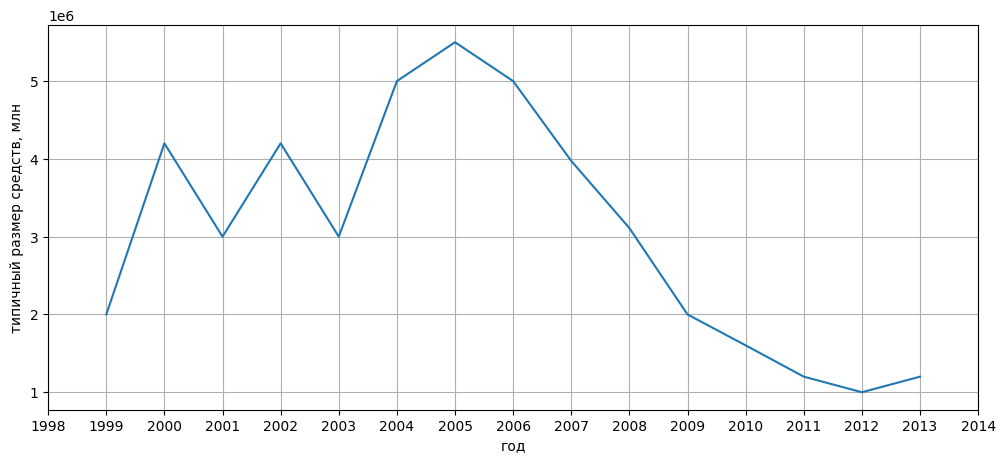

In [210]:
plt.figure(figsize=(12, 5))

# Посторим линейный график 
sns.lineplot(data=pivot,
             x='год',
             y='типичный размер средств')

plt.xticks(range(1998, 2015, 1))
plt.ylabel('типичный размер средств, млн')
plt.grid()
plt.show()

В 2005 году наблюдается максимальный типичный размер собранных средств. А в 2013 году наблюдался рекордный рост количества раундов финансирования (11 072), что говорит о высокой активности на рынке инвестиций. Однако типичный размер средств снизился до 1 200 000, что может указывать на изменение стратегии инвесторов или увеличение числа небольших раундов.

### Люди и их образование
Выясним, зависит ли полнота сведений о сотрудниках от размера компаний. Подготовим данные:

In [211]:
# Объединяем таблицы, сохраняя всех сотрудников из people_df
people_ed = people_df.merge(ed_df, left_on='id', right_on='person_id', how='left')

# Преобразование в тип float64, который поддерживает пропущенные значения
people_ed['company_id'] = people_ed['company_id'].astype('float64')

Посчитаем общее количество сотрудников для каждой компании:

In [212]:
company_size = people_df.groupby('company_id')['id'].nunique().reset_index()
company_size.columns = ['company_id', 'employee_count']

Добавим информацию о размере компании:

In [213]:
people_ed = people_ed.merge(company_size, on='company_id', how='left')

Вычисляем квартили для количества сотрудников:

In [214]:
quartiles = company_size['employee_count'].quantile([0.25, 0.5, 0.75]).values

Разделим компании на группы по квартилям:

In [215]:
def categorize_company_size(employee_count):
    if employee_count <= quartiles[0]:
        return 'Малые компании'
    elif quartiles[0] < employee_count <= quartiles[1]:
        return 'Средние компании'
    elif quartiles[1] < employee_count <= quartiles[2]:
        return 'Крупные компании'
    else:
        return 'Очень крупные компании'

# Применяем функцию к столбцу employee_count
people_ed['company_size'] = people_ed['employee_count'].apply(categorize_company_size)

Определим, есть ли информация об образовании или нет:

In [216]:
people_ed['is_education'] = people_ed['instituition'].notna() & people_ed['graduated_at'].notna()

Расчитаем долю сотрудников без информации об образовании и выведем результат:

In [217]:
education_completeness = people_ed.groupby('company_size')['is_education'].mean().reset_index()
education_completeness['missing_share'] = (1 - education_completeness['is_education']) * 100

# Выводим результат
education_completeness[['company_size', 'missing_share']]

,company_size,missing_share
0,Малые компании,49.88
1,Очень крупные компании,81.19


In [218]:
# код ревьюера
people_ed[people_ed['company_id'] == 1]

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,employee_count,company_size,is_education
4393,104800,Alex,Weinstein,1.00,alexweinstein,NaN,NaN,NaN,NaT,2.00,Очень крупные компании,False
191139,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,Washington University in St Louis,NaT,2.00,Очень крупные компании,False
191140,3,Kevin,Flaherty,1.00,NaN,707.00,3.00,Indiana University,NaT,2.00,Очень крупные компании,False


Малые компании имеют более низкую долю сотрудников без информации об образовании по сравнению с очень крупными компаниями. Это может указывать на то, что малые компании более тщательно собирают данные о сотрудниках или нанимают людей с более формальным образованием.
Несоостветствие типов данных в столбцах `object_id` (из `degrees_df`) и `id` из `people` затрудняет объединение этих двух таблиц.

### Объединять или не объединять — вот в чём вопрос
В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.  
Cтолбец `network_username` нельзя использовать для объединения, потому что он относится к разным сущностям: в `company_and_rounds.csv` относится к компаниям, а в `people.csv` относится к сотрудникам. При этом в обоих датасетах значения в столбце `network_username` могут быть не уникальными (например, несколько компаний или сотрудников могут использовать одинаковые ники). Чтобы наглядно продемонстрировать различия данных, построим диаграмму Венна:

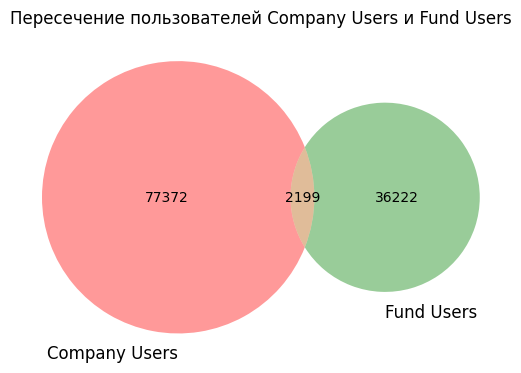

In [219]:
# Создаём множества
set_company = set(company_rounds_df['network_username'].dropna())  # Убираем пропуски
set_people = set(people_df['network_username'].dropna())  # Убираем пропуски

# Строим диаграмму Венна
venn2([set_company, set_people], set_labels=('Company Users', 'Fund Users'))

# Отображаем график
plt.title("Пересечение пользователей Company Users и Fund Users")
plt.show()  

Как видно из визуализации, данные из столбцов `network_username` в разных датасетах имеют разное происхождение и не являются ключами для объединения.

### Проблемный датасет и причина возникновения пропусков
Первичная предобработка показала, что датасет `company_rounds_df` состоит из двух логически связанных таблиц. Разделим его таким образом: `company_df` c информацией о компаниях, а `rounds_df` c информацией о раундах.

In [220]:
# Создаем таблицу company_df, выбирая только те столбцы, которые относятся к информации о компаниях
company_df = company_rounds_df[[
    'company_ID',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]]

# Удаляем дубликаты в таблице company_df, оставляя только уникальные записи о компаниях
company_df = company_df.drop_duplicates(subset=['company_ID'])

# Переименовываем столбец 'company_ID' в 'company_id' для единообразия именовани
company_df = company_df.rename(columns={'company_ID': 'company_id'})

# Создаем таблицу rounds_df, выбирая только те столбцы, которые относятся к раундам финансирования
rounds_df = company_rounds_df[[
    'funding_round_id',
    'company_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round'
]]

# Удаляем дубликаты в таблице rounds_df, оставляя только уникальные записи о раундах финансирования
rounds_df = rounds_df.drop_duplicates(subset=['company_id'])

In [221]:
# Выводим информацию о компаниях 
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int32         
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  category      
 3   status             196553 non-null  category      
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   category      
 9   investment_rounds  196553 non-null  Int16         
 10  funding_rounds     196553 non-null  Int8          
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  Int8          
dtypes: Int16(1), Int32(1), Int8(2), category(3), date

In [222]:
# Выводим инвормацию о раундах
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31940 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     31939 non-null  Int32         
 1   company_id           31939 non-null  Int32         
 2   funded_at            31714 non-null  datetime64[ns]
 3   funding_round_type   31939 non-null  category      
 4   raised_amount        31939 non-null  float64       
 5   pre_money_valuation  31939 non-null  float64       
 6   participants         31939 non-null  Int8          
 7   is_first_round       31939 non-null  Int8          
 8   is_last_round        31939 non-null  Int8          
dtypes: Int32(2), Int8(3), category(1), datetime64[ns](1), float64(2)
memory usage: 1.5 MB


Предобработка и первичный анализ помогли ответить на следующие вопросы:
- **Раунды финансирования:** анализ динамики по годам показал, что в 2005 году наблюдается максимальный типичный размер собранных средств, 2013 год показал рекордный рост количества раундов финансирования (11 072), что говорит о высокой активности на рынке инвестиций.
- **Люди и образование:** оценка полноты данных об образовании и группировка компаний по размеру показали, что полнота данных зависит от этого параметра.
- **Объединение данных:** cтолбцы `network_username` не подходят для объединения, так как указывают на разную информацию. Объединять стоит по `company_id`.
- **Проблемный датасет:** разделение таблицы `company_rounds_df` на `company_df` и `rounds_df` позволило устранить дублирование и упростит анализ.

## Исследовательский анализ объединённых таблиц
### Объединение данных
Объединим данные таблиц `acq_df` и `company_df`. Возьмем из первой таблицы ключ `acquired_company_id`, так как заказчика интересуют компании, которые продавались. 


In [223]:
# Объединяем таблицы
company_acquisitions = company_df.merge(acq_df, left_on='company_id', right_on='acquired_company_id', how='left')
company_acquisitions.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000.00",5,NaN,NaN,NaN,NaN,NaN,NaT
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.00,0,1.00,11.00,10.00,NaN,"20,000,000.00",2007-05-30
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.00,4,20.00,377.00,100.00,cash,0.00,2005-05-29
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaT
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0.00,0,NaN,NaN,NaN,NaN,NaN,NaT


Нужны компании, которые меняли или готовы менять владельцев. Сделаем фильтрацию датасета.

In [224]:
# Создаем фильтр
mask = (company_acquisitions['funding_rounds'] > 0) | (company_acquisitions['investment_rounds'] > 0) | (company_acquisitions['status'] == 'acquired')

# Фильтруем датасет
company_acquisitions = company_acquisitions[mask]

# Вывод количества строк
print(f'Количество строк после фильтрации: {company_acquisitions.shape[0]}')

Количество строк после фильтрации: 40890


### Анализ выбросов
Заказчика интересует типичный размер средств для рассматриваемого периода. Построим боксплот.

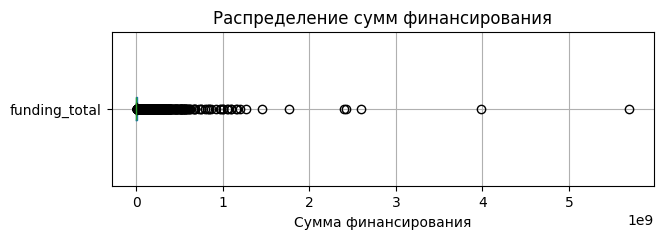

count          40,890.00
mean       10,135,585.95
std        56,412,886.91
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,631,320.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

In [239]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце funding_total
company_acquisitions.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение cумм финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

# Выводим описательные статистики
company_acquisitions['funding_total'].describe()

Диаграмма размаха показывает наличие большого количества аномально высоких значений. В таких случаях среднее значение сильно искажается выбросами и не отражает типичный размер финансирования. Более надежным показателем является медиана, так как она устойчива к выбросам. Таким образом, типичным значением финансирования для одной компании можно считать 600,000.00 долларов. При этом явным выбросом является сумма 5,700,000,000.00 долларов, которая значительно превышает значения для большинства компаний.

###  Куплены забесплатно?
Отфильтруем компании, которые были проданы за 0 или 1 доллар, и у которых `funding_total` больше 0:

In [226]:
filtered_companies = company_acquisitions[(company_acquisitions['price_amount'].isin([0, 1]) & (company_acquisitions['funding_total'] > 0))]
filtered_companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,"121,500,000.00",3,"9,288.00","23,283.00","10,054.00",cash_and_stock,0.00,2013-08-13
170,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,"4,000,000.00",2,"9,653.00","11,391.00","101,312.00",NaN,0.00,2013-09-18
177,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,"250,000.00",1,"7,272.00","1,972.00","101,340.00",NaN,0.00,2012-06-18
181,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,"1,310,000.00",2,"8,254.00",757.00,"10,137.00",cash_and_stock,0.00,2012-11-05
184,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,"44,925,000.00",1,"9,326.00","44,008.00","10,139.00",NaN,0.00,2013-04-01


Для определения выбросов в столбце `funding_total` используем метод межквартильного размаха (IQR):

In [227]:
# Рассчитаем квартили и IQR
Q1 = filtered_companies['funding_total'].quantile(0.25)
Q3 = filtered_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: -18250000.0
Верхняя граница выбросов: 35750000.0


Найдем, каким процентилям соответствуют `lower_bound` и `upper_bound`:

In [228]:
# Доля данных, которые меньше или равны нижней границе
lower_percentile = (filtered_companies['funding_total'] <= lower_bound).mean() * 100

# Доля данных, которые меньше или равны верхней границе
upper_percentile = (filtered_companies['funding_total'] <= upper_bound).mean() * 100

print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных.")
print(f"Верхняя граница соответствует {upper_percentile:.2f}% данных.")

Нижняя граница соответствует 0.00% данных.
Верхняя граница соответствует 90.91% данных.


Изучим основные характеристики отфильтрованных данных:

In [229]:
# Фильтрация данных
filtered_companies_no_outliers = filtered_companies[
    (filtered_companies['funding_total'] >= lower_bound) & 
    (filtered_companies['funding_total'] <= upper_bound)
]

# Описательная статистика
print("Количество компаний:", filtered_companies_no_outliers.shape[0])

Количество компаний: 1471


In [230]:
# Распределение по категориям
print("\nРаспределение по категориям:")
print(filtered_companies_no_outliers['category_code'].value_counts())


Распределение по категориям:
category_code
software            344
web                 206
enterprise          123
mobile              102
advertising          72
games_video          67
ecommerce            54
biotech              51
network_hosting      49
hardware             34
semiconductor        33
analytics            30
cleantech            30
security             29
public_relations     24
other                17
social               16
travel               16
messaging            15
search               15
education            10
consulting            9
health                9
medical               8
news                  8
music                 7
finance               6
fashion               4
manufacturing         3
design                3
photo_video           3
hospitality           3
automotive            2
legal                 2
sports                2
transportation        1
government            0
local                 0
nanotech              0
real_estate         

In [231]:
# Распределение по странам
print("\nРаспределение по странам:")
print(filtered_companies_no_outliers['country_code'].value_counts())


Распределение по странам:
country_code
USA    1113
GBR      62
CAN      42
DEU      30
ISR      27
       ... 
VNM       0
YEM       0
ZAF       0
ZMB       0
ZWE       0
Name: count, Length: 175, dtype: int64


Компании, проданные за 0 или 1 доллар, привлекли в среднем 8.31 млн финансирования, при этом. Больше всего таких компаний в категориях software, web и enterprise, а основная доля сосредоточена в США. Причины продажи за символическую сумму могут включать стратегические приобретения, финансовые проблемы, юридические причины или символические сделки.

### Цены стартапов по категориям

Отфильтруем данные, чтобы оставить только строки, где указана цена покупки:

In [232]:
# Фильтрация данных
acquired_data = company_acquisitions.dropna(subset=['price_amount'])

Для каждой категории стартапов рассчитаем медиану цены покупки (median_price), cтандартное отклонение цен (std_price), количество сделок (count), самую дорогую покупку (max_price) и самую дешевую (min_price):

In [233]:
# Удаляем строки с price_amount = 0
acquired_data = acquired_data[acquired_data['price_amount'] != 0]

# Ограничиваем данные 90-м квантилем
price_percentile = acquired_data['price_amount'].quantile(0.90)
acquired_data = acquired_data[acquired_data['price_amount'] <= price_percentile]

# Группировка по категориям и расчёт метрик
category_stats = acquired_data.groupby('category_code')['price_amount'].agg(
    median_price='median',
    std_price='std',
    min_price='min',
    max_price='max',
    count='count'
).reset_index()

# Удаляем категории с малым количеством сделок
category_stats = category_stats[category_stats['count'] >= 10]

# Сортировка по медианной цене (по убыванию)
category_stats_sorted_by_median = category_stats.sort_values(by='median_price', ascending=False)

# Сортировка по стандартному отклонению (по убыванию)
category_stats_sorted_by_std = category_stats.sort_values(by='std_price', ascending=False)

# Топ-10 категорий по медианной цене
top_categories_by_median = category_stats_sorted_by_median.head(10)
print("Топ категорий по медианной цене покупки:\n")
print(top_categories_by_median)

Топ категорий по медианной цене покупки:

      category_code   median_price      std_price    min_price      max_price  \
4         cleantech 162,500,000.00 144,408,850.87   450,000.00 520,000,000.00   
34         security 148,500,000.00 214,993,289.96 1,850,000.00 717,000,000.00   
11          finance 131,500,000.00 191,282,683.02 1,200,000.00 616,000,000.00   
3           biotech 120,750,000.00 213,811,447.66   109,000.00 785,000,000.00   
7         ecommerce 105,000,000.00 180,037,597.37        11.00 575,000,000.00   
19    manufacturing  97,200,000.00 217,682,311.93       373.00 615,000,000.00   
35    semiconductor  75,000,000.00 135,066,849.09 1,500,000.00 605,000,000.00   
33           search  72,500,000.00 129,363,773.10    50,000.00 500,000,000.00   
25  network_hosting  64,115,000.00 180,466,624.41    10,000.00 748,000,000.00   
0       advertising  50,000,000.00 166,353,455.62    10,000.00 750,000,000.00   

    count  
4      34  
34     31  
11     16  
3     226  
7     

C:\Users\Asus\AppData\Local\Temp\ipykernel_14460\3162593967.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = acquired_data.groupby('category_code')['price_amount'].agg(


In [234]:
# Топ-10 категорий по разбросу цен
top_categories_by_std = category_stats_sorted_by_std.head(10)
print("\nТоп категорий по стандартному отклонению цены:\n")
print(top_categories_by_std)


Топ категорий по стандартному отклонению цены:

       category_code   median_price      std_price    min_price  \
19     manufacturing  97,200,000.00 217,682,311.93       373.00   
34          security 148,500,000.00 214,993,289.96 1,850,000.00   
3            biotech 120,750,000.00 213,811,447.66   109,000.00   
14          hardware  50,000,000.00 198,357,834.40        49.00   
11           finance 131,500,000.00 191,282,683.02 1,200,000.00   
25   network_hosting  64,115,000.00 180,466,624.41    10,000.00   
7          ecommerce 105,000,000.00 180,037,597.37        11.00   
9         enterprise  43,300,000.00 175,412,981.10    20,000.00   
31  public_relations  40,000,000.00 170,601,548.95    25,000.00   
0        advertising  50,000,000.00 166,353,455.62    10,000.00   

        max_price  count  
19 615,000,000.00     14  
34 717,000,000.00     31  
3  785,000,000.00    226  
14 775,000,000.00     73  
11 616,000,000.00     16  
25 748,000,000.00     56  
7  575,000,000.00     46

Был выбран топ-10, чтобы сосредоточиться на наиболее значимых категориях. Это число достаточно велико, чтобы охватить разнообразие, но достаточно мало, чтобы выделить ключевые тенденции. Категории с высокой средней ценой покупки привлекательны для инвесторов, готовых к высоким рискам ради потенциально больших доходов. Категории с большим разбросом цен интересны, так как они могут включать как очень успешные, так и неудачные стартапы, что создаёт возможности для высокодоходных инвестиций.  
Исходя из полученных результатов можно сделать следующие выводы:  
- Cleantech лидирует с медианной ценой в 120 млн, но при этом имеет высокое стандартное отклонение (118 млн), что указывает на значительный разброс цен.
- Security и Finance также находятся в топе, но их стандартное отклонение близко к медианной цене, что говорит о высокой волатильности цен.
- Ecommerce имеет медиану 73 млн, но минимальная цена всего 11, а максимальная — 350 млн, что указывает на экстремальные выбросы.
- Ecommerce и Manufacturing имеют самые высокие стандартные отклонения (128 млн), что подтверждает наличие сильных выбросов.
- Biotech и Semiconductor также имеют высокие стандартные отклонения, но их медианные цены ниже, чем у лидеров.

### Сколько раундов продержится стартап перед покупкой
Сначала изучим основные характеристики столбца `funding_rounds`:

In [235]:
# Описательная статистика
print(company_acquisitions['funding_rounds'].describe())

# Уникальные значения
print("Уникальные значения funding_rounds:", company_acquisitions['funding_rounds'].unique())

count   40,890.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: Float64
Уникальные значения funding_rounds: <IntegerArray>
[3, 0, 1, 5, 2, 7, 4, 6, 8, 10, 9, 13, 11, 15, 14, 12]
Length: 16, dtype: Int8


- Большинство стартапов прошли 1 или 2 раунда финансирования.
- Только 25% стартапов прошли более 2 раундов.
- Максимальное количество раундов — 15, но такие случаи редки.
- Cтартапы проходили от 0 до 15 раундов финансирования.  
Теперь исследуем, сколько в среднем раундов финансирования проходили стартапы в зависимости от их статуса:

In [236]:
# Группировка по статусу и расчёт среднего количества раундов
status_rounds = company_acquisitions.groupby('status')['funding_rounds'].mean().reset_index()

# Сортировка по убыванию
status_rounds_sorted = status_rounds.sort_values(by='funding_rounds', ascending=False)

print("Среднее количество раундов по статусам:")
print(status_rounds_sorted)

Среднее количество раундов по статусам:
      status  funding_rounds
2        ipo            1.93
3  operating            1.52
1     closed            1.38
0   acquired            0.53


C:\Users\Asus\AppData\Local\Temp\ipykernel_14460\3250358401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_rounds = company_acquisitions.groupby('status')['funding_rounds'].mean().reset_index()


Стартапы, которые вышли на IPO, прошли в среднем 1.93 раунда финансирования. Действующие стартапы (operating) прошли в среднем 1.52 раунда, что указывает на их активное развитие и продолжение привлечения финансирования. Закрытые стартапы (closed) прошли в среднем 1.38 раунда, что может свидетельствовать о недостаточном финансировании для продолжения работы. Наиболее неожиданным результатом является то, что приобретённые стартапы (acquired) прошли в среднем всего 0.53 раунда. Таким образом, количество раундов финансирования варьируется в зависимости от статуса стартапа.  
Для наглядности построим столбчатую диаграмму:

C:\Users\Asus\AppData\Local\Temp\ipykernel_14460\3973629560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='funding_rounds', data=status_rounds_sorted, palette='viridis')


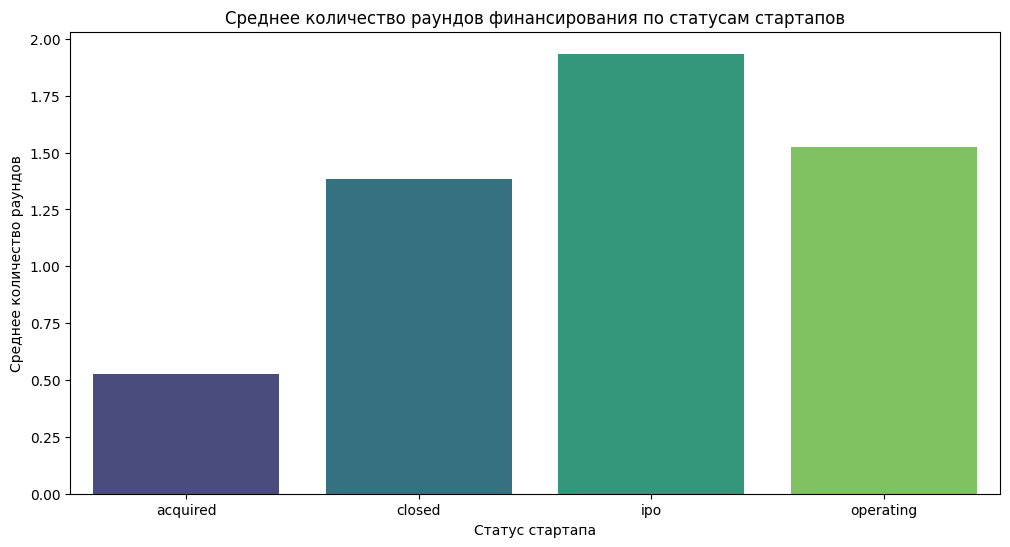

In [237]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Cтроим столбчатую диаграмму
sns.barplot(x='status', y='funding_rounds', data=status_rounds_sorted, palette='viridis')

# Добавляем заголовок и метки оси
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')

# Выводим результат
plt.show()

## Итоговый вывод и рекомендации
Анализ рынка инвестиций в стартапы был проведен на основе проблемного датасета. Но данных хватило, чтобы ответить на поставленные вопросы. Стоит отметить, что в крупных компаниях большая доля пропусков в информации об образовании сотрудников (81.19%), что может искажать результаты анализа. Малые компании тщательнее проводят сбор данных (доля пропусков составляет 49.88%).

Проведенное исследование показывает, что рынок инвестиций в стартапы остается активным, особенно в категориях Enterprise, Biotech и Software. Эти категории привлекательны для инвесторов, так как демонстрируют как высокие медианные цены покупки, так и значительный разброс цен. Например:

- Cleantech лидирует по медианной цене (120 млн), но имеет высокое стандартное отклонение (118 млн), что указывает на значительную волатильность.

- Biotech и Semiconductor также показывают высокие медианные цены (60 млн и 68.75 млн соответственно), но их разброс цен остается значительным.

При этом стартапы, проданные за 0 или 1 доллар, чаще всего связаны со стратегическими приобретениями, финансовыми проблемами или юридическими причинами.

Динамика раундов финансирования показывает, что пик активности пришёлся на 2013 год (11,072 раунда), но средний размер финансирования снизился до $1,200,000, что может указывать на изменение стратегии инвесторов или увеличение числа небольших раундов.

Рекомендации:
- обратить внимание на Cleantech и Biotech, так как они имеют высокий потенциал доходности. Однако важно учитывать их высокий разброс цен, что указывает на повышенный риск.
- улучшить качество данных, особенно в части об образовании сотрудников.
- учитывать разброс цен в категориях с высоким риском (например, Games/Video, Other), так как они могут предложить как высокую доходность, так и значительные потери